# Image Logging

Whylogs has optional support for logging data about images. This example demonstrates how to use whylogs with image data.

## Install whylogs with Image Logging Support

Whylogs uses [Pillow](https://python-pillow.org) for working with images. To install whylogs with the optional image support enabled, use the following:








In [ ]:
pip install whylogs[image]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


This will install all the dependencies whylogs needs to work with image data.

## Basic Image Logging

The `log_image()` function provides a simple interface for logging images.

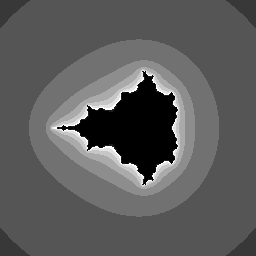

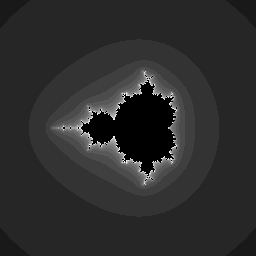

{'image/image/ImagePixelWidth/mean': 256.0, 'image/image/ImagePixelWidth/stddev': 0.0, 'image/image/ImagePixelWidth/n': 1, 'image/image/ImagePixelWidth/max': 256.0, 'image/image/ImagePixelWidth/min': 256.0, 'image/image/ImagePixelWidth/q_01': 256.0, 'image/image/ImagePixelWidth/q_05': 256.0, 'image/image/ImagePixelWidth/q_10': 256.0, 'image/image/ImagePixelWidth/q_25': 256.0, 'image/image/ImagePixelWidth/median': 256.0, 'image/image/ImagePixelWidth/q_75': 256.0, 'image/image/ImagePixelWidth/q_90': 256.0, 'image/image/ImagePixelWidth/q_95': 256.0, 'image/image/ImagePixelWidth/q_99': 256.0, 'image/image/ImagePixelHeight/mean': 256.0, 'image/image/ImagePixelHeight/stddev': 0.0, 'image/image/ImagePixelHeight/n': 1, 'image/image/ImagePixelHeight/max': 256.0, 'image/image/ImagePixelHeight/min': 256.0, 'image/image/ImagePixelHeight/q_01': 256.0, 'image/image/ImagePixelHeight/q_05': 256.0, 'image/image/ImagePixelHeight/q_10': 256.0, 'image/image/ImagePixelHeight/q_25': 256.0, 'image/image/Imag

In [ ]:
import os
from PIL import Image

from whylogs.extras.image_metric import log_image

img1 = Image.effect_mandelbrot((256, 256), (-3, -2.5, 2, 2.5), 9)
img2 = Image.effect_mandelbrot((256, 256), (-3, -2.5, 2, 2.5), 20)

display(img1)
display(img2)

results = log_image(img1)
print(results.view().get_column("image").to_summary_dict())

As you can see above, just passing in an `Image` results in a column named "image" in the profile. You can pass in a list of images, which will append an index to each column name:

In [ ]:
results = log_image([img1, img2])
print(results.view().get_column("image_1").to_summary_dict())

You can change the default name if you like:

In [ ]:
results = log_image([img1, img2], default_column_prefix="awesome_image")
print(results.view().get_column("awesome_image_0").to_summary_dict())

You can also pass a dictionary of images to give each "column" a unique name:

In [ ]:
results = log_image({"left_camera": img1, "right_camera": img2})
print(results.view().get_column("right_camera").to_summary_dict())

{'image/image/ImagePixelWidth/mean': 256.0, 'image/image/ImagePixelWidth/stddev': 0.0, 'image/image/ImagePixelWidth/n': 1, 'image/image/ImagePixelWidth/max': 256.0, 'image/image/ImagePixelWidth/min': 256.0, 'image/image/ImagePixelWidth/q_01': 256.0, 'image/image/ImagePixelWidth/q_05': 256.0, 'image/image/ImagePixelWidth/q_10': 256.0, 'image/image/ImagePixelWidth/q_25': 256.0, 'image/image/ImagePixelWidth/median': 256.0, 'image/image/ImagePixelWidth/q_75': 256.0, 'image/image/ImagePixelWidth/q_90': 256.0, 'image/image/ImagePixelWidth/q_95': 256.0, 'image/image/ImagePixelWidth/q_99': 256.0, 'image/image/ImagePixelHeight/mean': 256.0, 'image/image/ImagePixelHeight/stddev': 0.0, 'image/image/ImagePixelHeight/n': 1, 'image/image/ImagePixelHeight/max': 256.0, 'image/image/ImagePixelHeight/min': 256.0, 'image/image/ImagePixelHeight/q_01': 256.0, 'image/image/ImagePixelHeight/q_05': 256.0, 'image/image/ImagePixelHeight/q_10': 256.0, 'image/image/ImagePixelHeight/q_25': 256.0, 'image/image/Imag

## Advanced Image Logging

The `log_image()` function provides a flexible interface for logging image data. If you want to log images along with other types of data, you can do so by setting up a custom `DatasetSchema` to specify which columns contain images.

In [ ]:
from typing import Dict

import whylogs as why
from whylogs.core.datatypes import DataType
from whylogs.core.metrics import Metric, MetricConfig
from whylogs.core.resolvers import StandardResolver
from whylogs.core.schema import DatasetSchema, ColumnSchema
from whylogs.extras.image_metric import ImageMetric

class ImageResolver(StandardResolver):
  def resolve(self, name: str, why_type: DataType, column_schema: ColumnSchema) -> Dict[str, Metric]:
    if "image" in name:
      return {ImageMetric.get_namespace(MetricConfig()): ImageMetric.zero(column_schema.cfg)}
    return super(ImageResolver, self).resolve(name, why_type, column_schema)

schema = DatasetSchema(resolvers=ImageResolver())

results = why.log(row={"numbers": 42, "images": img1}, schema=schema)
print(results.view().get_column("numbers").to_summary_dict())
print(results.view().get_column("images").to_summary_dict())

{'counts/n': 1, 'counts/null': 0, 'types/integral': 1, 'types/fractional': 0, 'types/boolean': 0, 'types/string': 0, 'types/object': 0, 'distribution/mean': 42.0, 'distribution/stddev': 0.0, 'distribution/n': 1, 'distribution/max': 42.0, 'distribution/min': 42.0, 'distribution/q_01': 42.0, 'distribution/q_05': 42.0, 'distribution/q_10': 42.0, 'distribution/q_25': 42.0, 'distribution/median': 42.0, 'distribution/q_75': 42.0, 'distribution/q_90': 42.0, 'distribution/q_95': 42.0, 'distribution/q_99': 42.0, 'ints/max': 42, 'ints/min': 42, 'cardinality/est': 1.0, 'cardinality/upper_1': 1.000049929250618, 'cardinality/lower_1': 1.0, 'frequent_items/frequent_strings': [FrequentItem(value='42.000000', est=1, upper=1, lower=1)]}
{'image/image/ImagePixelWidth/mean': 256.0, 'image/image/ImagePixelWidth/stddev': 0.0, 'image/image/ImagePixelWidth/n': 1, 'image/image/ImagePixelWidth/max': 256.0, 'image/image/ImagePixelWidth/min': 256.0, 'image/image/ImagePixelWidth/q_01': 256.0, 'image/image/ImagePi